In [8]:
import xarray as xr
import matplotlib.pyplot as plt

In [9]:
def load_dataset(filename):
    ds = xr.open_dataset(filename)
    return ds

def extract_variables(ds, time_var, lat_var, lon_var, precip_var):
    time = ds[time_var]
    lat = ds[lat_var]
    lon = ds[lon_var]
    precip = ds[precip_var]
    return time, lat, lon, precip


In [10]:
def print_summary_statistics(time, lat, lon, precip):
    print("Time range:", time.min().values, "to", time.max().values)
    print("Latitude range:", lat.min().values, "to", lat.max().values)
    print("Longitude range:", lon.min().values, "to", lon.max().values)
    print("Precipitation statistics:")
    print("Mean:", precip.mean().values)
    print("Standard Deviation:", precip.std().values)
    print("Min:", precip.min().values)
    print("Max:", precip.max().values)
    print("25th percentile:", precip.quantile(0.25).values)
    print("Median:", precip.median().values)
    print("75th percentile:", precip.quantile(0.75).values)

def print_missing_values(time, lat, lon, precip):
    missing_time = time.isnull().sum().item()
    missing_lat = lat.isnull().sum().item()
    missing_lon = lon.isnull().sum().item()
    missing_precip = precip.isnull().sum().item()
    print(f"Missing values in time: {missing_time}")
    print(f"Missing values in latitude: {missing_lat}")
    print(f"Missing values in longitude: {missing_lon}")
    print(f"Missing values in precipitation: {missing_precip}")

In [11]:
def plot_mean_precip_time(precip, lat_var, lon_var):
    mean_precip_time = precip.mean(dim=[lat_var, lon_var])
    plt.figure(figsize=(10, 5))
    mean_precip_time.plot()
    plt.title('Mean Precipitation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.show()

def plot_mean_precip_spatial(precip, time_var):
    mean_precip_spatial = precip.mean(dim=time_var)
    plt.figure(figsize=(10, 5))
    mean_precip_spatial.plot()
    plt.title('Mean Precipitation')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

def plot_precip_time_slice(precip, time_slice):
    precip_time_slice = precip.sel(time=time_slice)
    plt.figure(figsize=(10, 5))
    precip_time_slice.plot()
    plt.title(f'Precipitation on {time_slice}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

def plot_missing_values(precip, time_var):
    plt.figure(figsize=(10, 5))
    precip.isnull().mean(dim=time_var).plot()
    plt.title('Fraction of Missing Values in Precipitation Data')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

def analyze_dataset(filename, time_var, lat_var, lon_var, precip_var, time_slice):
    ds = load_dataset(filename)
    time, lat, lon, precip = extract_variables(ds, time_var, lat_var, lon_var, precip_var)
    print_summary_statistics(time, lat, lon, precip)
    print_missing_values(time, lat, lon, precip)
    plot_mean_precip_time(precip, lat_var, lon_var)
    plot_mean_precip_spatial(precip, time_var)
    plot_precip_time_slice(precip, time_slice)
    plot_missing_values(precip, time_var)


Time range: 1981-01-01T00:00:00.000000000 to 2019-03-31T00:00:00.000000000
Latitude range: -39 to 10
Longitude range: -84 to -35
Precipitation statistics:
Mean: 2.496597
Standard Deviation: 7.170901
Min: 0.0
Max: 907.46436
25th percentile: 0.0
Median: 0.0
75th percentile: 0.0
Missing values in time: 0
Missing values in latitude: 0
Missing values in longitude: 0
Missing values in precipitation: 0


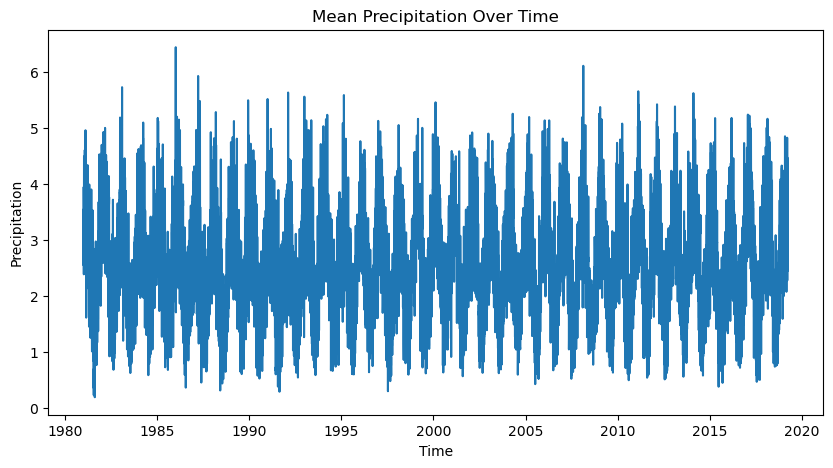

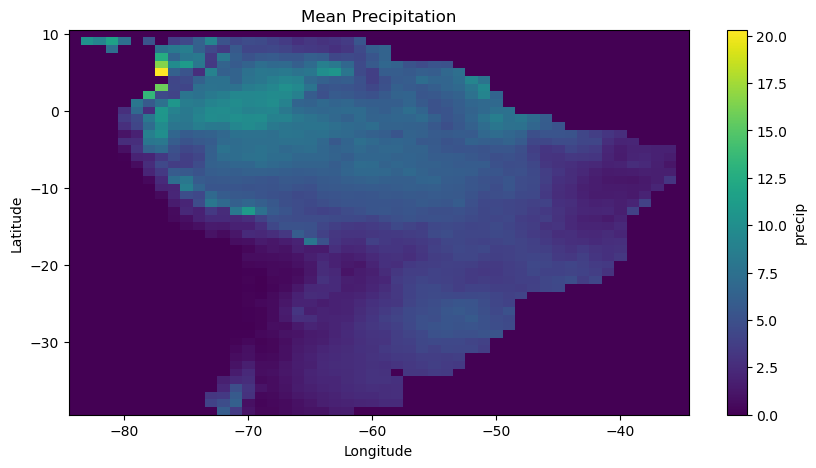

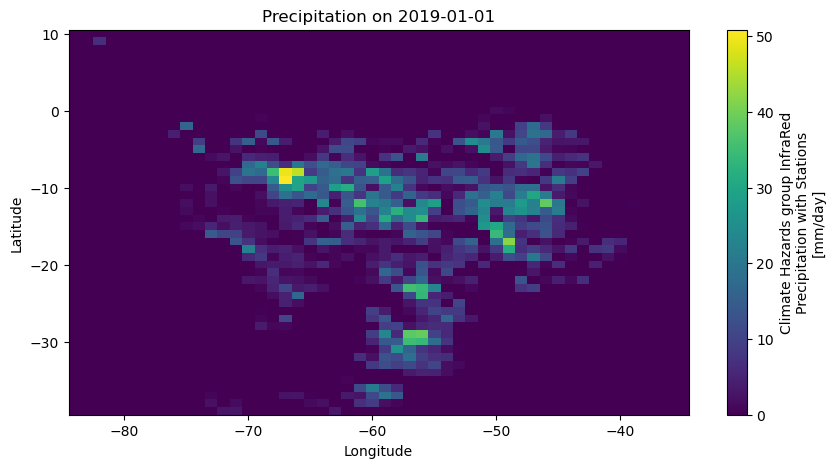

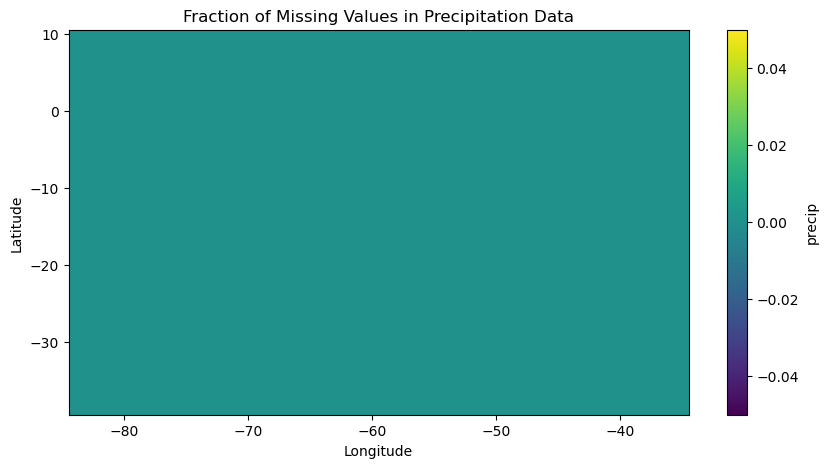

In [12]:
analyze_dataset('./baseline-chirps-1981-2019.nc', 'time', 'lat', 'lon', 'precip', '2019-01-01')

Time range: 1979-01-01T00:00:00.000000000 to 2015-12-31T18:00:00.000000000
Latitude range: -54 to 8
Longitude range: 278 to 340
Precipitation statistics:
Mean: 19.35824
Standard Deviation: 8.341881
Min: -25.949997
Max: 48.75
25th percentile: 13.050018310546875
Median: 21.850006
75th percentile: 25.550018310546875
Missing values in time: 0
Missing values in latitude: 0
Missing values in longitude: 0
Missing values in precipitation: 0


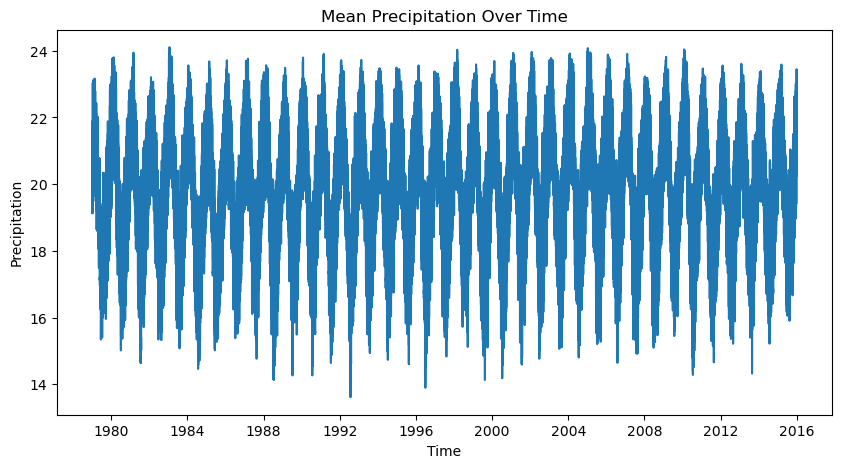

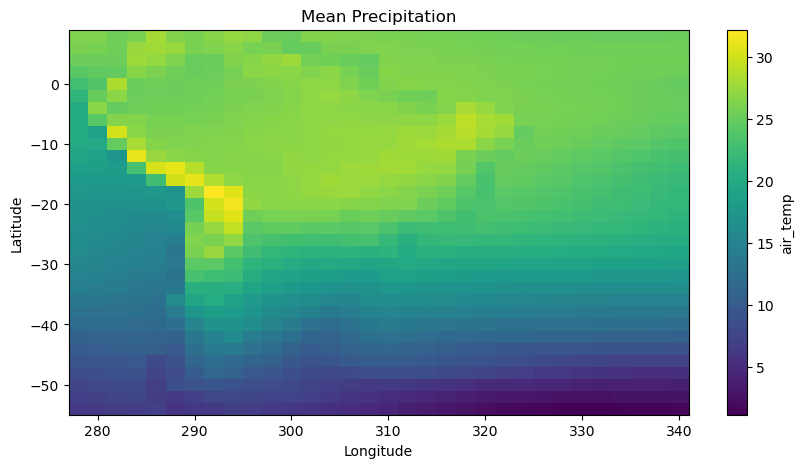

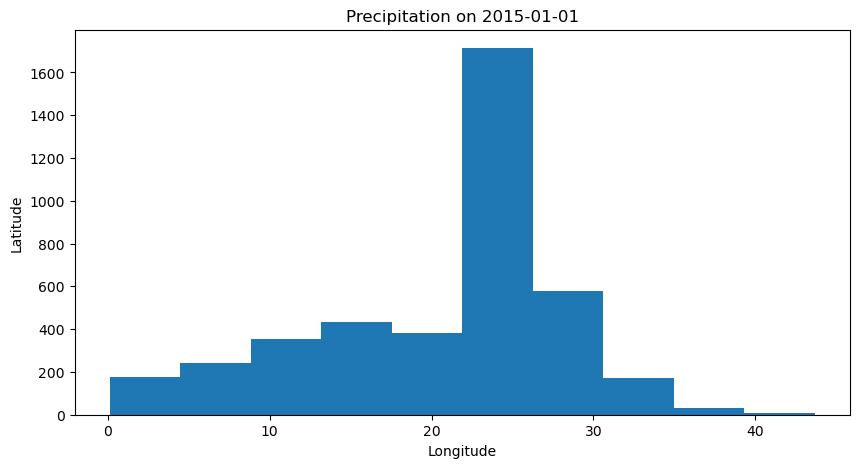

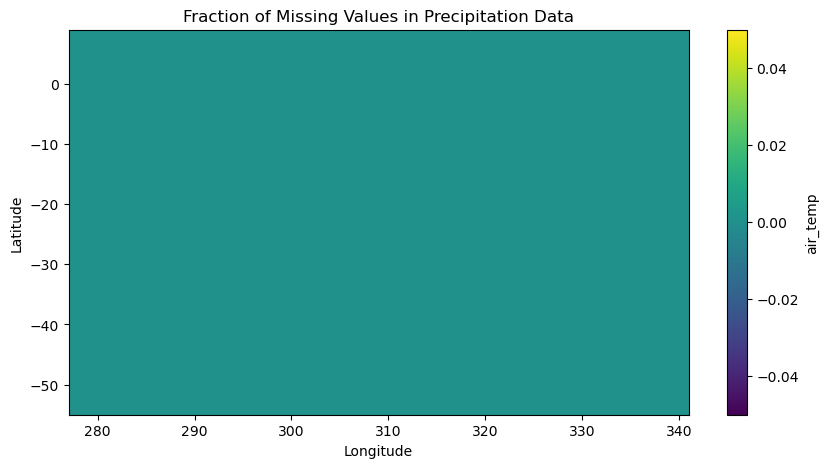

In [16]:
analyze_dataset('./baseline-ucar-1979-2015.nc', 'time', 'lat', 'lon', 'air_temp', '2015-01-01')

Time range: 2023-01-01T00:00:00.000000000 to 2023-01-31T23:00:00.000000000
Latitude range: -23.0 to -22.0
Longitude range: -44.0 to -42.0
Precipitation statistics:
Mean: 0.004659056100455385
Standard Deviation: 0.007685023853447313
Min: 0.0
Max: 0.058716658502817154
25th percentile: 6.182304238619082e-05
Median: 0.0008646266072851634
75th percentile: 0.005895588679726806
Missing values in time: 0
Missing values in latitude: 0
Missing values in longitude: 0
Missing values in precipitation: 20088


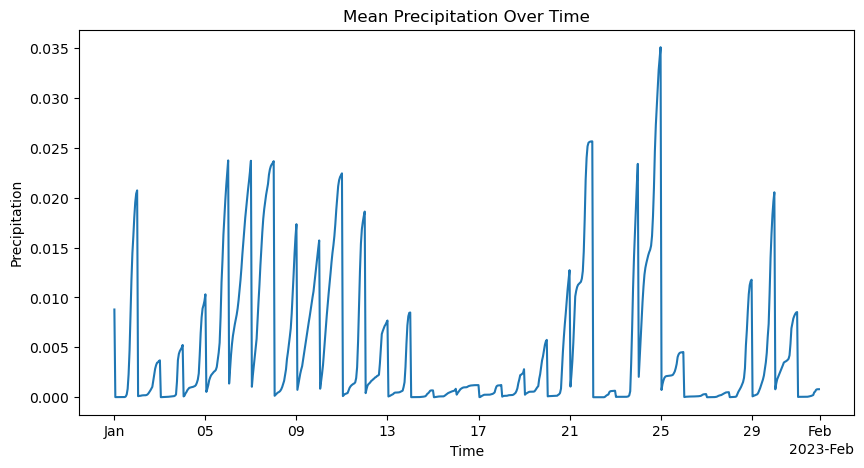

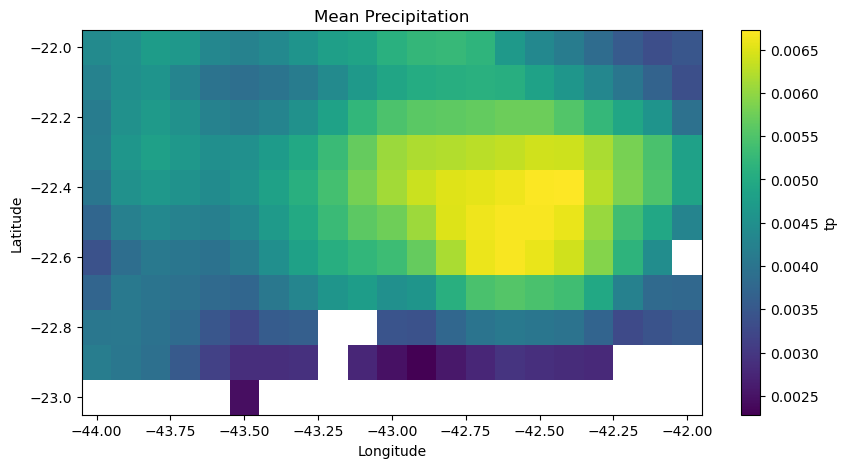

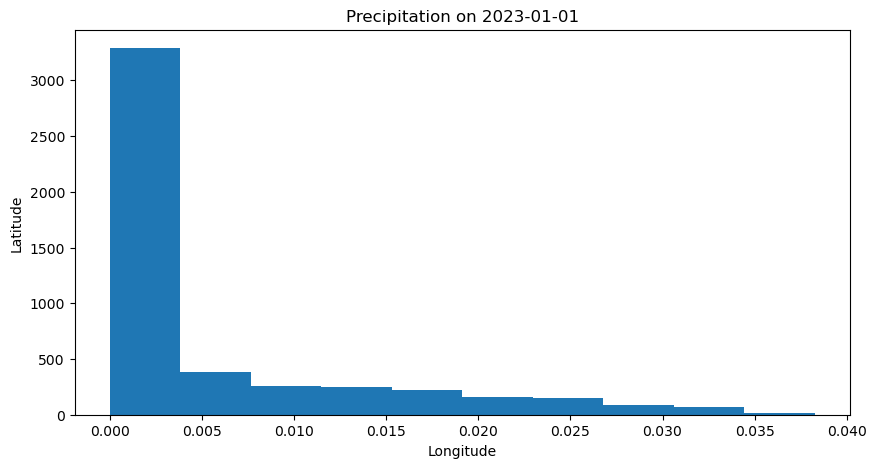

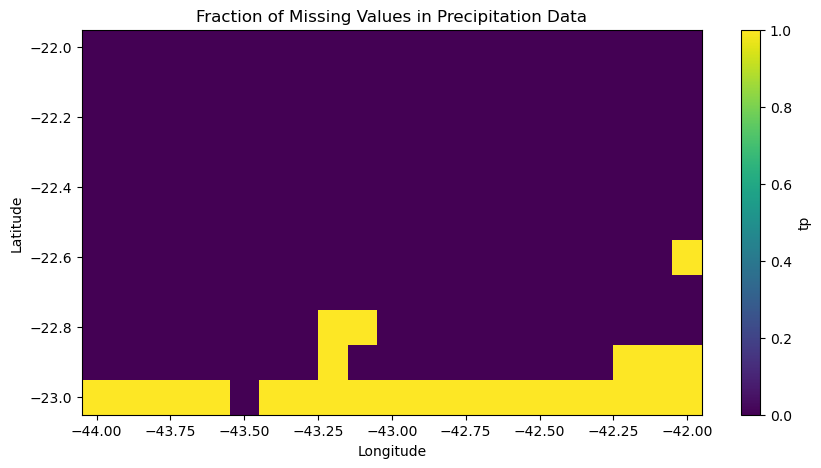

In [ ]:
analyze_dataset('./ERA5Land/montly_data/RJ_2023_1.nc', 'time', 'latitude', 'longitude', 'tp', '2023-01-01')